# Определение перспективного тарифа для телеком компании #

Компания «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В проекте сделаем предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Тариф «Смарт»   
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  

Тариф «Ультра»  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from functools import reduce
from scipy import stats as st
import copy

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
DATE = '%Y-%m-%d' 

In [4]:
display(df_calls.head())
df_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
display(df_internet.head())
df_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
display(df_messages.head())
df_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
display(df_tariffs)
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [8]:
display(df_users.head())
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Выводы 

Изучив данные всех датасетов, мы обнаружили, что нужно заменить тип данных в столбцах с датой временем, а такж и в других столбцах для того, чтобы сэкономить количество затраччиваемой памяти. Уберем пропуски в столбце churn_date, округлим значения с минутами разговора и мегабайтами затраченного интернета в большую сторону, так как плата в тарифе взимается за минуты и мегабайты. Проверим таблицы на наличие дубликатов и разберемся с возникающими в процессе анализа пропусками.

## Предобработка данных

Сразу заменим тип данных в столбцах с датой и временем. Изменим с object на datetime. Далее будем проводить предобработку данных по таблицам, чтобы не запутаться и чтобы было удобнее читать код. 

In [9]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format=DATE)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format=DATE)
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format=DATE)
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format=DATE)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format=DATE)

Проверим таблицы на наличие дубликатов.

In [10]:
df_calls.duplicated().sum()
df_internet.duplicated().sum()
df_messages.duplicated().sum()
df_users.duplicated().sum()

0

#### Обрабатываем звонки (df_calls)

Округлим значения длительности звонков в минутах вверх и создадим столбец с месяцем для дальнейших расчетов. 

In [11]:
def ceil_value(value):
    return math.ceil(value)
df_calls['duration'] = df_calls['duration'].apply(ceil_value)   

df_calls['duration'] = df_calls['duration'].apply(np.ceil)

df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

Посмотрим сколько звонков было произведено с длительностью в ноль минут и построим график, отображающий зависимость количества этих нулевых значений от общего числа звонков за каждый месяц. 

In [12]:
print(df_calls.loc[df_calls['duration'] == 0, 'duration'].value_counts()[0])

39613


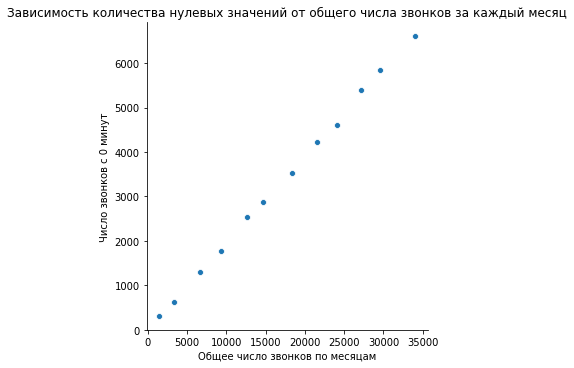

In [13]:
df_calls.loc[df_calls['duration'] == 0, 'nulls_count'] = 1
null_calls = df_calls.pivot_table(index='month', 
                                  values=['id', 'nulls_count'], 
                                  aggfunc='count')
null_calls['null_ratio'] = round(null_calls['nulls_count'] / null_calls['id'], 3)

sns.relplot(x='id', y='nulls_count', data=null_calls)
plt.xlabel('Общее число звонков по месяцам')
plt.ylabel('Число звонков с 0 минут')
з = plt.title('Зависимость количества нулевых значений от общего числа звонков за каждый месяц')

Нулевые значения встречаются систематично. Меняем эти значения на 1. 

In [14]:
df_calls.loc[df_calls['duration'] == 0, 'duration'] = 1

#### Обрабатываем интернет-трафик (df_internet) 

Аналогично создадим столбец с месяцами для дальнейших расчетов, округлим значения объёма потраченного за сессию интернет-трафика (в мегабайтах) вверх. Посмотрим зависимость количества нулевых значений от общего числа интернет-сессий за каждый месяц. 

In [15]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)

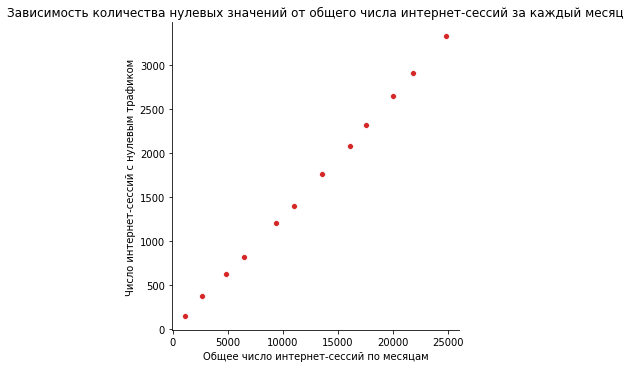

In [16]:
df_internet.loc[df_internet['mb_used'] == 0, 'nulls_count'] = 1
null_mb = df_internet.pivot_table(index='month', 
                                  values=['id', 'nulls_count'], 
                                  aggfunc='count')
null_mb['null_ratio'] = round(null_mb['nulls_count'] / null_mb['id'], 3)

sns.relplot(x='id', y='nulls_count', data=null_mb, color='tab:red')
plt.xlabel('Общее число интернет-сессий по месяцам')
plt.ylabel('Число интернет-сессий с нулевым трафиком')
i = plt.title('Зависимость количества нулевых значений от общего числа интернет-сессий за каждый месяц')

Также как и в звонках нулевые значения в интернет-сессиях встречаются систематично, заменим их на 1.

In [17]:
df_internet.loc[df_internet['mb_used'] == 0, 'mb_used'] = 1

#### Обрабатываем сообщения (df_messages)

Заменим тип данных в user_id на int и создадим столбец с месяцем.

In [18]:
df_messages['user_id'] = df_messages['user_id'].astype('int')

df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

#### Обрабатываем юзеров (df_users)

Добавим информацию о тарифах в виде 0 и 1.

In [19]:
def tariff_id(object):
    if object == 'smart':
        return 0
    elif object == 'ultra':
        return 1
df_users['tariff_id'] = df_users['tariff'].apply(tariff_id)

### Рассчет данных для каждого пользователя 

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.

In [20]:
df_users['unique_name'] = df_users['city'] + df_users['first_name'] + df_users['last_name']

calls_temp = df_calls.merge(df_users, on='user_id', how='inner')
calls_grouped = calls_temp.pivot_table(values=['unique_name', 'duration'], 
                                       index=['user_id', 'month'], 
                                       aggfunc={'unique_name': 'count', 'duration': 'sum'})
calls_grouped.columns = ['duration', 'calls']
display(calls_grouped.head(10))

duration  calls
user_id month                 
1000    5         164.0     22
        6         187.0     43
        7         346.0     47
        8         418.0     52
        9         478.0     58
        10        363.0     57
        11        344.0     43
        12        341.0     46
1001    11        444.0     59
        12        430.0     63

Далее посчитаем количество отправленных сообщений по месяцам.


In [21]:
df_messages['month'] = df_messages['message_date'].dt.month
messages_temp = df_messages.merge(df_users, on='user_id', how='inner')
messages_grouped = messages_temp.pivot_table(values='unique_name', 
                                             index=['user_id', 'month'], 
                                             aggfunc={'unique_name': 'count'})
messages_grouped.columns = ['messages']
display(messages_grouped.head(10))

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

Посчитаем объем израсходованного интернет-трафика по месяцам.


In [22]:
df_internet['month'] = df_internet['session_date'].dt.month
internet_temp = df_internet.merge(df_users, on='user_id', how='inner')
internet_grouped = internet_temp.pivot_table(values='mb_used', 
                                             index=['user_id', 'month'], 
                                             aggfunc={'mb_used': 'sum'})
internet_grouped.columns = ['mb_used']
display(internet_grouped.head(10))

mb_used
user_id month         
1000    5       2257.0
        6      23262.0
        7      14017.0
        8      14072.0
        9      14583.0
        10     14717.0
        11     14769.0
        12      9829.0
1001    11     18460.0
        12     14059.0

Объединим все три сводные таблицы в одну! 

In [23]:
common_data = [calls_grouped, messages_grouped, internet_grouped]
grouped_data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), common_data)
display(grouped_data.head(10))

duration  calls  messages  mb_used
user_id month                                    
1000    5         164.0   22.0      22.0   2257.0
        6         187.0   43.0      60.0  23262.0
        7         346.0   47.0      75.0  14017.0
        8         418.0   52.0      81.0  14072.0
        9         478.0   58.0      57.0  14583.0
        10        363.0   57.0      73.0  14717.0
        11        344.0   43.0      58.0  14769.0
        12        341.0   46.0      70.0   9829.0
1001    11        444.0   59.0       NaN  18460.0
        12        430.0   63.0       NaN  14059.0

Посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

После объединения тблиц мы увидели, что в некоторых столбцах есть пропущенные значения. Клиент мог в каком-то месяце не писать сообщений, но звонить и использовать интернет. Эти значения заменим на 0. 

In [24]:
grouped_data.loc[grouped_data['duration'].isna(), 'duration'] = 0
grouped_data.loc[grouped_data['messages'].isna(), 'messages'] = 0
grouped_data.loc[grouped_data['mb_used'].isna(), 'mb_used'] = 0

Добавим название используемого тарифа для каждого пользователя и напишем функцию для подсчета ежемесячной выручки с каждого пользователя. 

In [25]:
for user in grouped_data.index:
    grouped_data.loc[user, 'tariff'] = df_users.loc[user[0]-1000, 'tariff']

In [26]:
def det_revenue(row):
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    
    if tariff == 'smart':
        extra_duration = duration - df_tariffs.loc[0,'minutes_included']
        extra_mb = mb_used - df_tariffs.loc[0, 'mb_per_month_included']
        extra_messages = messages - df_tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (df_tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (df_tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                   df_tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   df_tariffs.loc[0, 'rub_monthly_fee']) 
    else:
        extra_duration = duration - df_tariffs.loc[1, 'minutes_included']
        extra_mb = mb_used - df_tariffs.loc[1, 'mb_per_month_included']
        extra_messages = messages - df_tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (df_tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (df_tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                   df_tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   df_tariffs.loc[1, 'rub_monthly_fee'])

grouped_data['revenue'] = grouped_data.apply(det_revenue, axis=1)
grouped_data.head(10)

duration  calls  messages  mb_used tariff     revenue
user_id month                                                       
1000    5         164.0   22.0      22.0   2257.0  ultra  1950.00000
        6         187.0   43.0      60.0  23262.0  ultra  1950.00000
        7         346.0   47.0      75.0  14017.0  ultra  1950.00000
        8         418.0   52.0      81.0  14072.0  ultra  1950.00000
        9         478.0   58.0      57.0  14583.0  ultra  1950.00000
        10        363.0   57.0      73.0  14717.0  ultra  1950.00000
        11        344.0   43.0      58.0  14769.0  ultra  1950.00000
        12        341.0   46.0      70.0   9829.0  ultra  1950.00000
1001    11        444.0   59.0       0.0  18460.0  smart  1155.46875
        12        430.0   63.0       0.0  14059.0  smart   550.00000

In [27]:
grouped_data

duration  calls  messages  mb_used tariff      revenue
user_id month                                                        
1000    5         164.0   22.0      22.0   2257.0  ultra  1950.000000
        6         187.0   43.0      60.0  23262.0  ultra  1950.000000
        7         346.0   47.0      75.0  14017.0  ultra  1950.000000
        8         418.0   52.0      81.0  14072.0  ultra  1950.000000
        9         478.0   58.0      57.0  14583.0  ultra  1950.000000
...                 ...    ...       ...      ...    ...          ...
1489    9           0.0    NaN      32.0  17246.0  smart   918.359375
        10          0.0    NaN      21.0  19599.0  smart  1377.929688
        11          0.0    NaN      20.0  17526.0  smart   973.046875
        12          0.0    NaN      35.0  17349.0  smart   938.476562
1476    4           0.0    NaN       0.0    531.0  ultra  1950.000000

[3214 rows x 6 columns]

#### Выводы

В предобработке данных мы заменили тип данных в столбцах с датой и временем на datetime вместо object. Посчитали количество нулевых значений в звонках и интернет-сессиях и округлили эти значения в большую сторону. Приведя все данные в порядок, мы провели необходимые расчеты для каждого пользователя:   
количество сделанных звонков и израсходованных минут разговора по месяцам;  
количество отправленных сообщений по месяцам;  
объем израсходованного интернет-трафика по месяцам;  
помесячную выручку с каждого пользователя.

# Анализ данных 

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

Для начала посчитаем, сколько в среднем каждому пользователю требуется минут, сообщений и мегабайт в месяц. 

In [28]:
mean = grouped_data.pivot_table(index='user_id', 
                                values=['duration', 'messages', 'mb_used', 'revenue'], 
                                aggfunc='mean')
for user_id in df_users['user_id']:
    mean.loc[user_id, 'tariff'] = df_users.loc[user_id-1000, 'tariff']
mean.head()

,duration,mb_used,messages,revenue,tariff
user_id,,,,,
1000,330.125,13438.250000,62.0,1950.000000,ultra
1001,437.000,16259.500000,0.0,852.734375,smart
1002,223.000,16607.857143,10.0,959.151786,smart
1003,782.800,11466.200000,76.0,1950.000000,ultra
1004,128.000,18649.250000,149.0,1950.000000,ultra


Найдем медиану, дисперсию и стандартное отклонение.

In [29]:
mean.dropna(subset=['duration'], inplace=True)
desc_stat = mean.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'mb_used': [np.median, np.var, np.std], 
                             'messages': [np.median, np.var, np.std]})
desc_stat

duration                                 mb_used               \
            median         std           var        median          std   
tariff                                                                    
smart   437.687500  148.814080  22145.630392  16282.185714  3585.221847   
ultra   529.583333  289.113314  83586.508375  18717.350000  8319.434812   

                     messages                          
                 var   median        std          var  
tariff                                                 
smart   1.285382e+07    27.75  26.512448   702.909910  
ultra   6.921300e+07    45.50  46.366246  2149.828793

Посмотрим на описательные статистики визуально. 

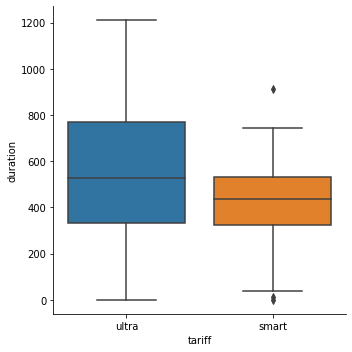

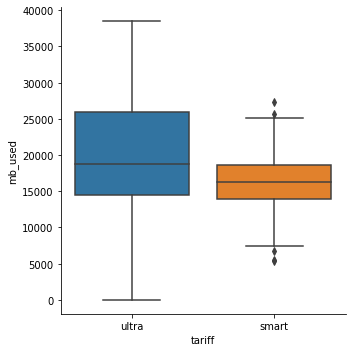

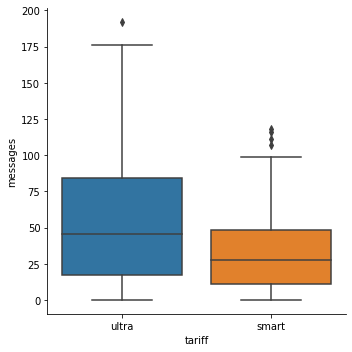

In [30]:
for column in ['duration', 'mb_used', 'messages']:    
    sns.catplot(x="tariff", y=column, kind="box", data=mean, orient='v')

Как мы видим, тариф Ультра имеет большую дисперсию по сравнению с тарифом Смарт. Медианы по этому тарифу аналогично смещены в большую сторону. Отметим, что и выбросов в тарифе Ультра намного больше, чем в тарифе Смарт. 

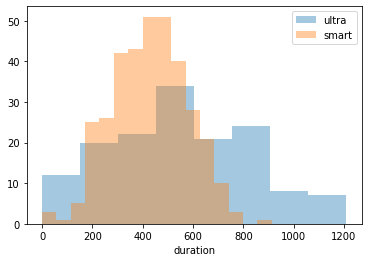

In [31]:
for tariff in ['ultra', 'smart']:
    sns.distplot(mean.query('tariff == @tariff')['duration'], kde=False, label=tariff)
d = plt.legend(['ultra', 'smart'])

Дисперсия в тарифе Смарт меньше, чем в Ультра по данному признаку. В тарифе Смарт больше выбросов.  

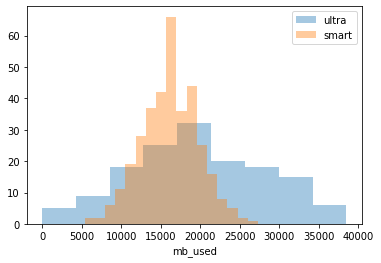

In [32]:
for tariff in ['ultra', 'smart']:
    sns.distplot(mean.query('tariff == @tariff')['mb_used'], kde=False)
u = plt.legend(['ultra', 'smart'])

Аналогичная ситуация с дисперсией. В тарифе Смарт она меньше, чем в тарифе Ультра. 
Тариф Смарт четко отображает моду на определенные значения, в отличие от тарифа Ультра, где клиенты ведут себя боле свободно в использовании данного тарифа. 

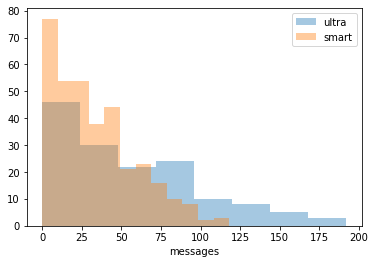

In [33]:
for tariff in ['ultra', 'smart']:
    sns.distplot(mean.query('tariff == @tariff')['messages'], kde=False, label=tariff)
m = plt.legend(['ultra', 'smart'])

Дисперсия в тарифе Смарт снова меньше, чем в тарифе Ультра. Клиенты обоих тарифов редко пользуются отправкой обычных сообщений.

#### Выводы 

В результате исследования было выявлено, что клиенты тарифа Ультра более свободны в его использовании. В распределении нет ярко-выраженных значений, в отличие от тарифа Смарт, где четко прослеживается сколько обычно клиенты тратят минут на разговоры, сколько отправляют смс, и как используют интернет-трафик. Об этом нам говорит дисперсия, которая в тарифе Ультра намного больше, чем в тарифе Смарт.   

# Проверяем гипотезы 

#### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Выдвигаем нулевую гипотезу и гипотезу 1. В нулевой гипотезе должно быть равенство: 

H0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

H1 — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

α=5%

In [34]:
ultra = grouped_data.query('tariff == "ultra"')['revenue']
smart = grouped_data.query('tariff == "smart"')['revenue']

alpha = .05

results = st.ttest_ind(ultra, smart, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.4535744400867116e-281
Отвергаем нулевую гипотезу


In [35]:
grouped_data.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,987.664062
ultra,1950.000000


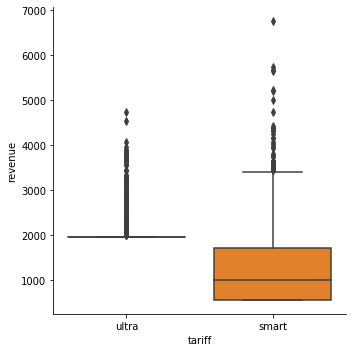

In [36]:
gd = sns.catplot(x="tariff", y='revenue', kind="box", data=grouped_data, orient='v')

#### Выводы
В результате мы отвергаем нулевую гипотезу, а это значит, что средняя выручка пользователей тарифов Смарт и Ультра различаются. И правда, среднее значение тарифа Ультра почти в два раза больше, чем среднее тарифа Смарт.

#### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1 — средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

α=5%

Добавим наименование населенного пункта для каждого пользователя. Затем создадим две таблицы, в одной будут все клиенты из Москвы, во второй - все остальные.

In [37]:
for user in grouped_data.index:
    grouped_data.loc[user, 'city'] = df_users.loc[user[0]-1000, 'city']

moscow = grouped_data.query('city == "Москва"')['revenue']
regions = grouped_data.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(moscow, regions, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5030013194608627
Не получилось отвергнуть нулевую гипотезу


In [38]:
def det_region(city):
    if city == 'Москва': return 'Москва'
    else: return 'Другой регион'
    
grouped_data['region'] = grouped_data['city'].apply(det_region)
grouped_data.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Другой регион,1545.898438
Москва,1733.593750


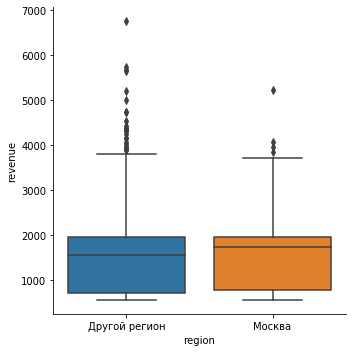

In [39]:
_ = sns.catplot(x="region", y='revenue', kind="box", data=grouped_data, orient='v')

#### Выводы

В процессе расчетов нам не удалось отвергнуть нулевую гипотезу, которая гласит, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. И действительно среднее по Москве и среднее по регионам почти не отличаются. 

# Общий вывод

После изучения всех предоставленных таблиц по сообщениям, звонкам, интернет-трафику, юзерам и тарифам, мы провели обработку данных: изменили тип данных в некоторых столбцах, обработали пропущенные значения. 

Затем мы провели необходимые расчеты для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя.

В результате анализа данных было выявлено, что клиенты тарифа Ультра более свободны в его использовании. Напомним, что тариф Ультра - это дорогой тариф за 1950 руб. В распределении нет ярко-выраженных значений, в отличие от тарифа Смарт, где четко прослеживается сколько обычно клиенты тратят минут на разговоры, сколько отправляют смс, и как используют интернет-трафик. Об этом нам говорит дисперсия, которая в тарифе Ультра намного больше, чем в тарифе Смарт.

При проверке гипотез мы выявили, что средняя выручка пользователей тарифов Смарт и Ультра различаются: в тарифе Смарт это 987 руб., а в тарифе Ультра это 1950 руб. Разница почти в два раза.   
Также было выявлено, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. В Москве это 1733 руб., а в регионах это 1545 руб. 